In [11]:
library(dplyr)
library(nycflights13)
library(ggplot2)

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

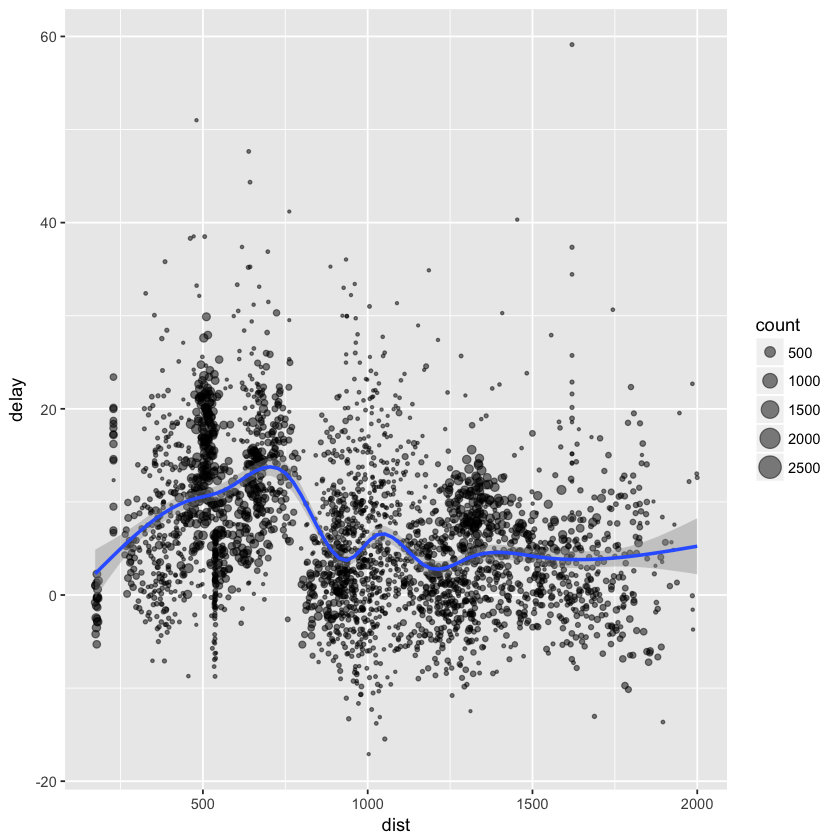

In [12]:
by_tailnum <- group_by(flights, tailnum)
delay <- summarise(by_tailnum,
  count = n(),
  dist = mean(distance, na.rm = TRUE),
  delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dist < 2000)

# Interestingly, the average delay is only slightly related to the
# average distance flown by a plane.
ggplot(delay, aes(dist, delay)) +
  geom_point(aes(size = count), alpha = 1/2) +
  geom_smooth() +
  scale_size_area()